In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



Label: 5


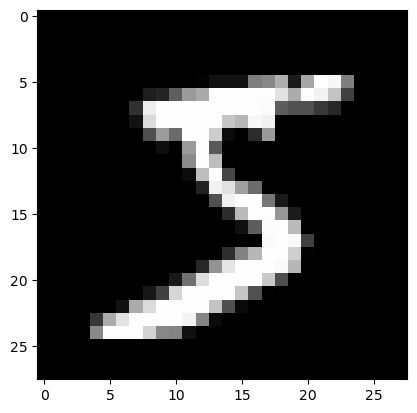

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)
import matplotlib.pyplot as plt
%matplotlib inline
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)


In [7]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [8]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


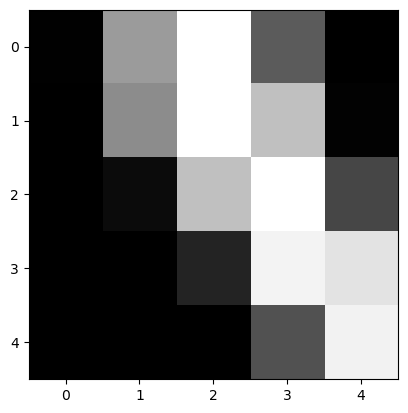

In [10]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [12]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

print(model.weight.shape)
model.weight
print(model.bias.shape)
model.bias
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

torch.Size([10, 784])
torch.Size([10])
tensor([3, 5, 8, 1, 7, 0, 5, 5, 4, 0, 2, 8, 3, 6, 2, 7, 1, 5, 8, 3, 5, 3, 5, 7,
        8, 0, 7, 2, 8, 3, 1, 3, 2, 8, 9, 1, 5, 6, 3, 3, 4, 3, 3, 5, 2, 5, 9, 8,
        0, 2, 1, 0, 7, 5, 2, 3, 8, 9, 9, 3, 7, 9, 3, 2, 1, 1, 0, 5, 3, 5, 9, 8,
        3, 5, 4, 2, 6, 7, 5, 5, 8, 5, 9, 3, 3, 8, 4, 1, 1, 2, 4, 1, 0, 6, 9, 1,
        0, 7, 6, 2, 5, 5, 8, 4, 1, 2, 9, 5, 3, 5, 0, 2, 1, 4, 5, 7, 8, 6, 6, 9,
        7, 3, 0, 4, 2, 6, 9, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0186,  0.0292,  0.0192,  ...,  0.0037,  0.0283,  0.0314],
         [ 0.0104,  0.0318, -0.0332,  ...,  0.0342,  0.0107, -0.0254],
         [ 0.0284,  0.0283,  0.0285,  ...,  0.0271, -0.0341, -0.0051],
         ...,
         [-0.0305,  0.0318, -0.0283,  ...,  0.0225, -0.0204, -0.0103],
         [-0.0080,  0.0335, -0.0049,  ..., -0.0233,  0.0237, -0.0048],
         [-0.0234,  0.0127, -0.0324,  ..., -0.0009,  0.0269, -0.0080]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0132,  0.0007, -0.0047,  0.0031,  0.0205, -0.0150,  0.0329, -0.0289,
         -0.0042,  0.0040], requires_grad=True)]

In [18]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1053,  0.1495,  0.0087, -0.0799, -0.0834, -0.2519, -0.1733, -0.2815,
         -0.1112,  0.1265],
        [ 0.1925, -0.0364,  0.1534,  0.0439, -0.0313, -0.2900,  0.1557, -0.1431,
         -0.0651,  0.2527]])


In [19]:
import torch.nn.functional as F
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

Sample probabilities:
 tensor([[0.0966, 0.1247, 0.1083, 0.0991, 0.0988, 0.0834, 0.0903, 0.0810, 0.0960,
         0.1218],
        [0.1170, 0.0930, 0.1125, 0.1008, 0.0935, 0.0722, 0.1127, 0.0836, 0.0904,
         0.1242]])
Sum:  1.0
tensor([1, 9, 9, 6, 2, 9, 9, 0, 6, 1, 0, 2, 6, 6, 6, 0, 7, 0, 6, 9, 2, 6, 5, 2,
        0, 2, 6, 6, 2, 2, 4, 0, 6, 9, 9, 4, 4, 9, 6, 4, 0, 1, 0, 5, 4, 2, 0, 0,
        0, 6, 4, 3, 9, 0, 9, 9, 6, 9, 6, 0, 0, 0, 9, 1, 9, 9, 3, 6, 4, 6, 9, 0,
        6, 9, 1, 3, 1, 4, 9, 6, 1, 4, 4, 6, 9, 9, 9, 9, 9, 0, 9, 6, 4, 2, 0, 6,
        9, 9, 0, 0, 0, 9, 9, 0, 4, 6, 0, 4, 1, 9, 1, 4, 9, 5, 4, 0, 4, 9, 9, 2,
        6, 6, 6, 7, 9, 2, 0, 9])
tensor([0.1247, 0.1242, 0.1359, 0.1174, 0.1441, 0.1638, 0.1242, 0.1140, 0.1187,
        0.1326, 0.1228, 0.1121, 0.1294, 0.1420, 0.1205, 0.1191, 0.1200, 0.1256,
        0.1376, 0.1176, 0.1330, 0.1231, 0.1185, 0.1404, 0.1223, 0.1516, 0.1179,
        0.1739, 0.1336, 0.1407, 0.1191, 0.1187, 0.1278, 0.1472, 0.1414, 0.1217,
        0.1489,

In [20]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [21]:
outputs

In [22]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [23]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [24]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9604, val_acc: 0.6051
Epoch [1], val_loss: 1.6883, val_acc: 0.7243
Epoch [2], val_loss: 1.4850, val_acc: 0.7606
Epoch [3], val_loss: 1.3316, val_acc: 0.7815
Epoch [4], val_loss: 1.2138, val_acc: 0.7960
